In [81]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from collections import Counter
from 

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROFI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
df = pd.read_json("korpus_berita.json")

In [39]:
df.head()

,section,articleid,articletype,createdate,author,originalTitle,tag,keywords,subsection,content
0,nasional,548642,singlepage,2020-09-20 16:41:19,CNN Indonesia,"Temukan Stiker Provokasi, PDIP Surabaya Lapor ...",pdip surabaya|pilkada 2020|surabaya,"pdip surabaya, pilkada 2020, surabaya",Berita Politik,PDI Perjuangan (PDIP) Surabaya melaporkan temu...
1,ekonomi,548641,singlepage,2020-09-20 16:39:32,Telkom,Telkom dan PERPAMSI Wujudkan Digitalisasi PDAM...,telkom|pdam,"telkom, pdam",Ragam Bisnis,PT Telkom Indonesia bekerja sama dengan PDAM K...
2,nasional,548637,singlepage,2020-09-20 16:18:14,CNN Indonesia,IDI: Dokter yang Lecehkan Wanita di Soetta Tak...,idi|pelecehan|rapid tes|corona|covid-19,"idi, pelecehan, rapid tes, corona, covid-19",Berita Peristiwa,Pengurus Besar Ikatan Dokter Indonesia (IDI) m...
3,teknologi,548636,singlepage,2020-09-20 16:02:22,CNN Indonesia,Arkeolog Berhasil Identifikasi Kapal Budak Suk...,arkeolog|budak|suku maya|kapal|bangkai kapal,"arkeolog, budak, suku maya, kapal, bangkai kapal",Berita Sains,Arkeolog Institut Antropologi dan Sejarah Nasi...
4,olahraga,548635,singlepage,2020-09-20 16:03:59,CNN Indonesia,"MotoGP Emilia Romagna: Vinales 'Mister Pole', ...",motogp emilia romagna|maverick vinales|motogp ...,"motogp emilia romagna, maverick vinales, motog...",Berita Moto GP,Maverick Vinales harus meraih kemenangan di Mo...


In [12]:
df.section.unique()

array(['nasional', 'ekonomi', 'teknologi', 'olahraga', 'internasional',
       'hiburan'], dtype=object)

In [13]:
df['section'].value_counts()

nasional         1204
ekonomi           548
olahraga          439
internasional     288
hiburan           281
teknologi         257
Name: section, dtype: int64

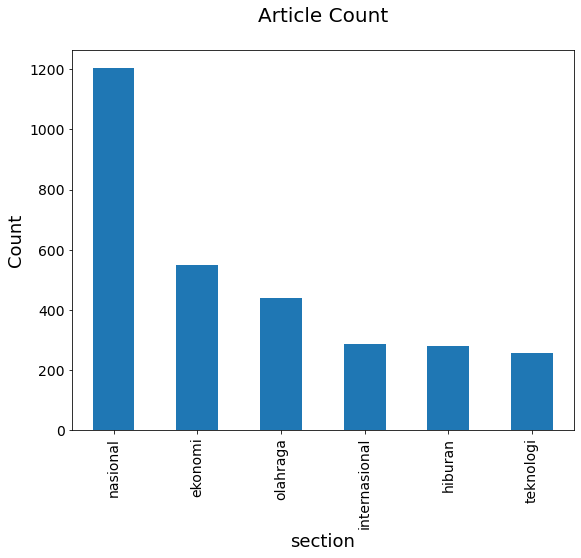

In [20]:
ax = df['section'].value_counts().plot(kind='bar', fontsize=14, figsize=(9,7))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('section', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [40]:
#a. Berapa rata-rata jumlah kalimat untuk setiap berita dalam korpus?
jumlah_berita = 3017
jumlah_kalimat = 0
for i in df['content']:
    jumlah_kalimat += len(sent_tokenize(i))
    
print("Berita: " + str(jumlah_berita) + " ,Kalimat: " + str(jumlah_kalimat))

Berita: 3017 ,Kalimat: 62303


In [45]:
rata2 = jumlah_kalimat/3017
print(rata2)

20.65064633742128


In [48]:
max = 0
max_no = 0
for i in range(len(df['content'])):
    ammount = len(sent_tokenize(df['content'][i]))
    if ammount > max:
        max = ammount
        max_no = i
print(max_no, max)

539 116


In [49]:
print(df['articleid'][539])

547680


In [51]:
min = max
min_no = max_no
for i in range(len(df['content'])):
    ammount = len(sent_tokenize(df['content'][i]))
    if ammount < min:
        min = ammount
        min_no = i
print(min_no, min)

529 4


In [57]:
df['articleid'][529]

547702

In [62]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [68]:
def clean_text(article):
    indo_punct = '''!"#$%&'-()*+,./:;<=>?@[\]^_`{|}~"'''
    clean1 = re.sub(r'['+ indo_punct + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [69]:
df['tokenized'] = df['content'].map(lambda x: clean_text(x))

In [70]:
df['tokenized'].head()

0    pdi perjuangan pdip surabaya melaporkan temuan...
1    pt telkom indonesia bekerja sama dengan pdam k...
2    pengurus besar ikatan dokter indonesia idi mem...
3    arkeolog institut antropologi dan sejarah nasi...
4    maverick vinales harus meraih kemenangan di mo...
Name: tokenized, dtype: object

In [73]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].head()

0    345
1    392
2    312
3    347
4    252
Name: num_wds, dtype: int64

In [72]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()

0    201
1    216
2    193
3    210
4    133
Name: uniq_wds, dtype: int64

In [75]:
big_string = ""
for i in df["tokenized"]:
    big_string += i

TypeError: string indices must be integers

In [79]:
len(set(big_string.split()))

38811

In [82]:
wd_counts = Counter()
for i, row in df.iterrows():
    wd_counts.update(row['tokenized'].split())

In [90]:
jomblo = 0
for key in wd_counts:
    if wd_counts[key] == 1:
        jomblo += 1
print(jomblo)

15552


In [93]:
common_list = wd_counts.most_common(100)
print(common_list)

[('yang', 22803), ('di', 19989), ('dan', 19125), ('itu', 9791), ('ini', 9539), ('dengan', 9410), ('untuk', 9113), ('dari', 8992), ('dalam', 8149), ('pada', 7504), ('akan', 5704), ('tidak', 5424), ('juga', 5274), ('tersebut', 4852), ('19', 4632), ('covid', 4101), ('ke', 4032), ('ada', 4018), ('bisa', 3768), ('saat', 3654), ('kata', 3494), ('indonesia', 3264), ('menjadi', 3087), ('atau', 3077), ('karena', 3075), ('sudah', 3027), ('kasus', 2989), ('orang', 2905), ('persen', 2839), ('ia', 2805), ('tahun', 2761), ('sebagai', 2751), ('lebih', 2689), ('oleh', 2663), ('telah', 2642), ('2020', 2555), ('dia', 2537), ('jakarta', 2503), ('mereka', 2435), ('saya', 2422), ('tak', 2421), ('pemerintah', 2382), ('mengatakan', 2330), ('bahwa', 2243), ('masih', 2231), ('kami', 2202), ('satu', 2199), ('kepada', 2175), ('namun', 2128), ('baru', 2094), ('seperti', 2024), ('lalu', 2022), ('kita', 2018), ('kesehatan', 2015), ('negara', 1995), ('hingga', 1990), ('hal', 1989), ('adalah', 1944), ('hanya', 1940),

In [113]:
word = []
for i in range(100):
    word += [common_list[i][0]]
print(word)

['yang', 'di', 'dan', 'itu', 'ini', 'dengan', 'untuk', 'dari', 'dalam', 'pada', 'akan', 'tidak', 'juga', 'tersebut', '19', 'covid', 'ke', 'ada', 'bisa', 'saat', 'kata', 'indonesia', 'menjadi', 'atau', 'karena', 'sudah', 'kasus', 'orang', 'persen', 'ia', 'tahun', 'sebagai', 'lebih', 'oleh', 'telah', '2020', 'dia', 'jakarta', 'mereka', 'saya', 'tak', 'pemerintah', 'mengatakan', 'bahwa', 'masih', 'kami', 'satu', 'kepada', 'namun', 'baru', 'seperti', 'lalu', 'kita', 'kesehatan', 'negara', 'hingga', 'hal', 'adalah', 'hanya', 'melakukan', 'secara', 'harus', 'dua', 'setelah', 'hari', 'psbb', 'dilakukan', 'sementara', 'kota', 'corona', 'dki', 'pandemi', 'virus', 'kembali', 'belum', 'masyarakat', 'rumah', 'daerah', 'kemudian', 'beberapa', 'dapat', 'jadi', 'banyak', 'selama', 'lain', 'besar', 'sebelumnya', 'bagi', 'memiliki', 'merupakan', 'juta', 'salah', 'pilkada', 'positif', 'sama', 'para', 'september', 'tengah', 'terjadi', 'atas']


In [114]:
jumlah = []
for i in range(100):
    jumlah += [common_list[i][1]]
print(jumlah)

[22803, 19989, 19125, 9791, 9539, 9410, 9113, 8992, 8149, 7504, 5704, 5424, 5274, 4852, 4632, 4101, 4032, 4018, 3768, 3654, 3494, 3264, 3087, 3077, 3075, 3027, 2989, 2905, 2839, 2805, 2761, 2751, 2689, 2663, 2642, 2555, 2537, 2503, 2435, 2422, 2421, 2382, 2330, 2243, 2231, 2202, 2199, 2175, 2128, 2094, 2024, 2022, 2018, 2015, 1995, 1990, 1989, 1944, 1940, 1914, 1907, 1827, 1782, 1776, 1768, 1683, 1672, 1667, 1656, 1619, 1613, 1577, 1569, 1566, 1522, 1505, 1478, 1464, 1443, 1426, 1425, 1419, 1408, 1407, 1403, 1399, 1398, 1384, 1382, 1372, 1365, 1362, 1362, 1357, 1335, 1294, 1279, 1272, 1240, 1237]


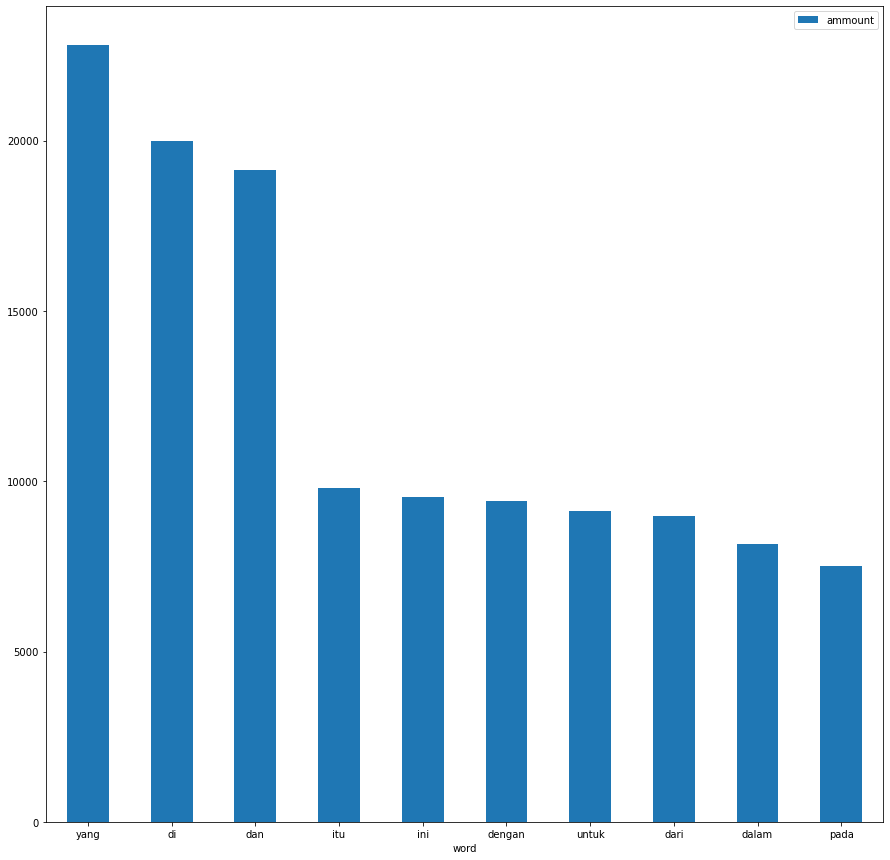

In [123]:
unique = pd.DataFrame({'word': word[0:10], 'ammount': jumlah[0:10]})
ax = unique.plot.bar(x='word', y='ammount', rot=0, figsize=(15, 15))

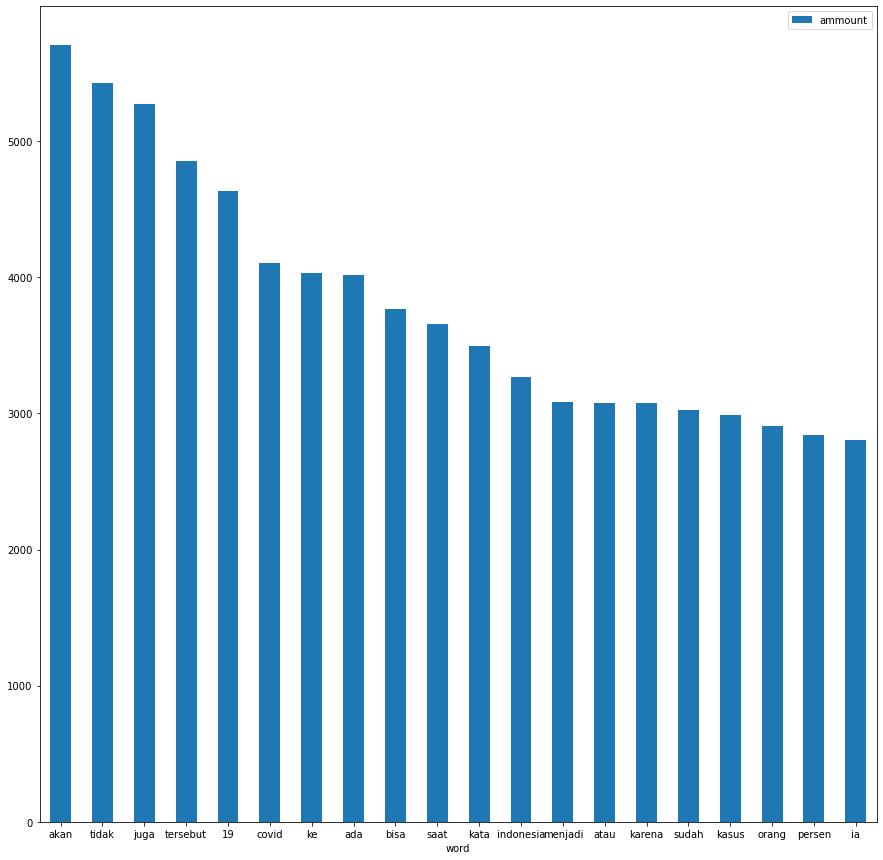

In [126]:
unique = pd.DataFrame({'word': word[10:30], 'ammount': jumlah[10:30]})
ax = unique.plot.bar(x='word', y='ammount', rot=0, figsize=(15, 15))

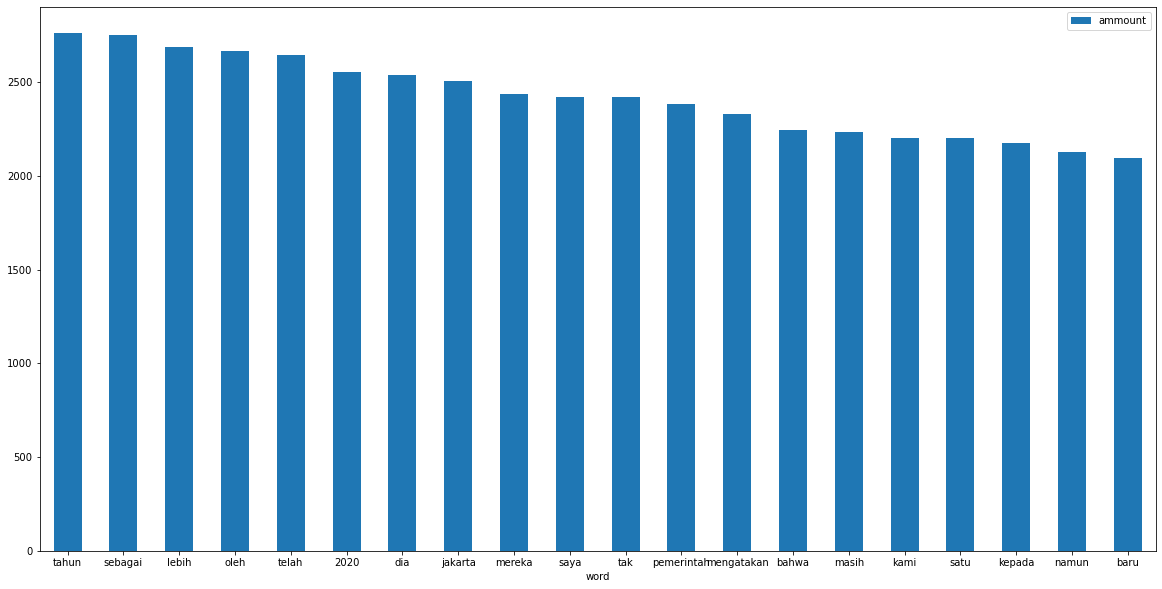

In [129]:
unique = pd.DataFrame({'word': word[30:50], 'ammount': jumlah[30:50]})
ax = unique.plot.bar(x='word', y='ammount', rot=0, figsize=(20, 10))

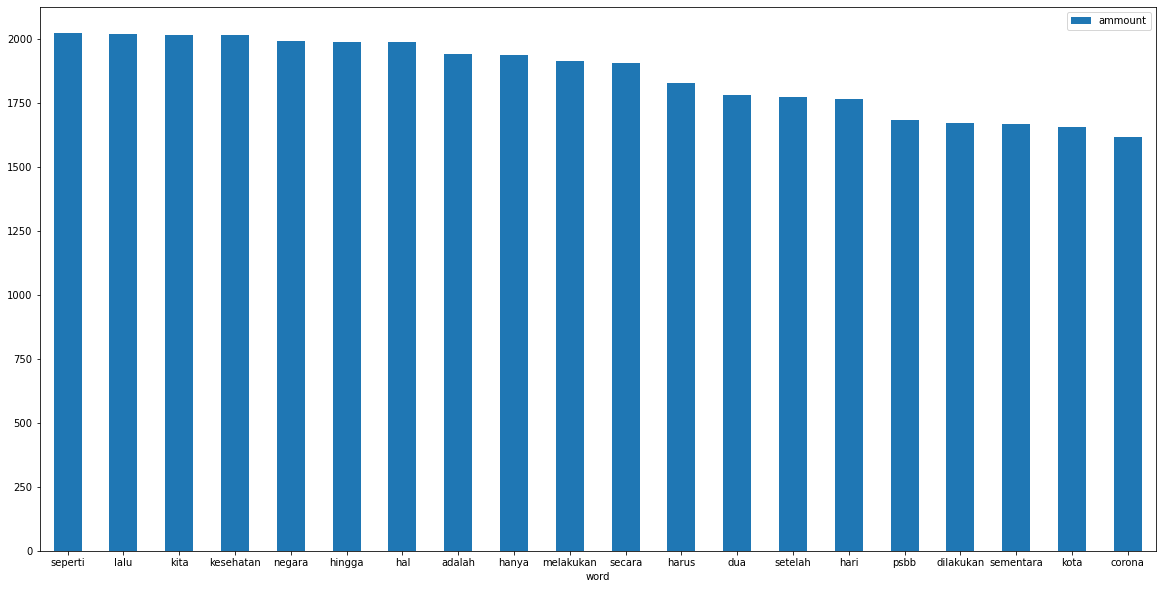

In [130]:
unique = pd.DataFrame({'word': word[50:70], 'ammount': jumlah[50:70]})
ax = unique.plot.bar(x='word', y='ammount', rot=0, figsize=(20, 10))

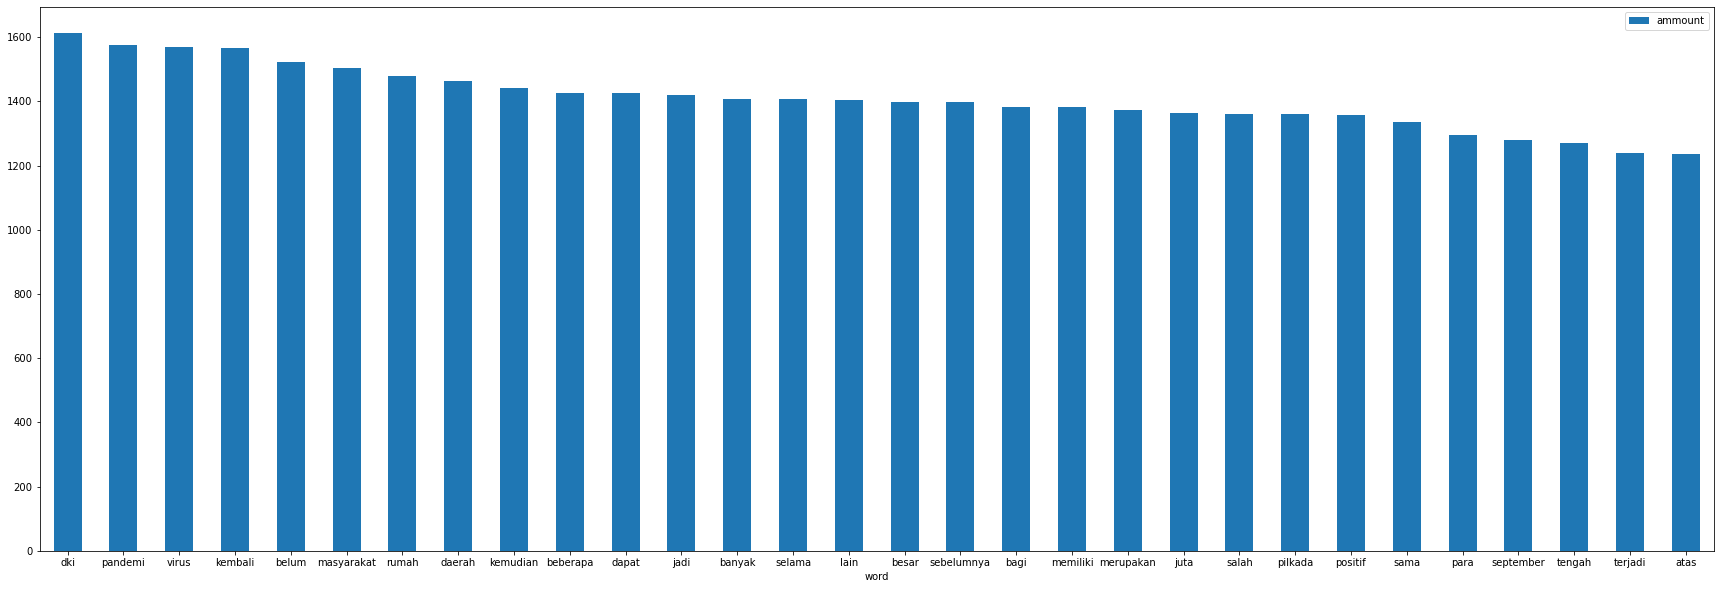

In [132]:
unique = pd.DataFrame({'word': word[70:], 'ammount': jumlah[70:]})
ax = unique.plot.bar(x='word', y='ammount', rot=0, figsize=(30, 10))

In [133]:
df.head()

,section,articleid,articletype,createdate,author,originalTitle,tag,keywords,subsection,content,tokenized,num_wds,uniq_wds
0,nasional,548642,singlepage,2020-09-20 16:41:19,CNN Indonesia,"Temukan Stiker Provokasi, PDIP Surabaya Lapor ...",pdip surabaya|pilkada 2020|surabaya,"pdip surabaya, pilkada 2020, surabaya",Berita Politik,PDI Perjuangan (PDIP) Surabaya melaporkan temu...,pdi perjuangan pdip surabaya melaporkan temuan...,345,201
1,ekonomi,548641,singlepage,2020-09-20 16:39:32,Telkom,Telkom dan PERPAMSI Wujudkan Digitalisasi PDAM...,telkom|pdam,"telkom, pdam",Ragam Bisnis,PT Telkom Indonesia bekerja sama dengan PDAM K...,pt telkom indonesia bekerja sama dengan pdam k...,392,216
2,nasional,548637,singlepage,2020-09-20 16:18:14,CNN Indonesia,IDI: Dokter yang Lecehkan Wanita di Soetta Tak...,idi|pelecehan|rapid tes|corona|covid-19,"idi, pelecehan, rapid tes, corona, covid-19",Berita Peristiwa,Pengurus Besar Ikatan Dokter Indonesia (IDI) m...,pengurus besar ikatan dokter indonesia idi mem...,312,193
3,teknologi,548636,singlepage,2020-09-20 16:02:22,CNN Indonesia,Arkeolog Berhasil Identifikasi Kapal Budak Suk...,arkeolog|budak|suku maya|kapal|bangkai kapal,"arkeolog, budak, suku maya, kapal, bangkai kapal",Berita Sains,Arkeolog Institut Antropologi dan Sejarah Nasi...,arkeolog institut antropologi dan sejarah nasi...,347,210
4,olahraga,548635,singlepage,2020-09-20 16:03:59,CNN Indonesia,"MotoGP Emilia Romagna: Vinales 'Mister Pole', ...",motogp emilia romagna|maverick vinales|motogp ...,"motogp emilia romagna, maverick vinales, motog...",Berita Moto GP,Maverick Vinales harus meraih kemenangan di Mo...,maverick vinales harus meraih kemenangan di mo...,252,133


In [138]:
df['title_tokenized'] = df['originalTitle'].map(lambda x: clean_text(x))

In [139]:
jumlah_kata = 0
title = 3017
for i in df['title_tokenized']:
    jumlah_kata += len(i.split())
print(jumlah_kata, title, jumlah_kata/title)

25608 3017 8.487901889294001


In [142]:
max = 0
id = 0
for i in range(len(df['title_tokenized'])):
    ammount = len(df['title_tokenized'][i].split())
    if max < ammount:
        max = ammount
        id = i
    
print(max, id, df['articleid'][id])

12 306 548031


In [143]:
min = max
id = id
for i in range(len(df['title_tokenized'])):
    ammount = len(df['title_tokenized'][i].split())
    if min > ammount:
        min = ammount
        id = i
    
print(min, id, df['articleid'][id])

3 451 547828


In [157]:
big_list_string = word_tokenize(big_string)
print(big_list_string[0:100])

['pdi', 'perjuangan', 'pdip', 'surabaya', 'melaporkan', 'temuan', 'stiker', 'berisi', 'hasutan', 'dan', 'provokasi', 'bergambar', 'bakal', 'calon', 'wali', 'kota', 'eri', 'cahyadi', 'dan', 'wakil', 'wali', 'kota', 'surabaya', 'dua', 'periode', 'wishnu', 'sakti', 'buana', 'ke', 'polisi', 'dan', 'bawaslu', 'stiker', 'itu', 'dinilai', 'memprovokasi', 'sebab', 'whisnu', 'sakti', 'buana', 'digambarkan', 'sedang', 'duduk', 'di', 'punggung', 'banteng', 'sementara', 'di', 'sebelahnya', 'ada', 'eri', 'cahyadi', 'duduk', 'di', 'atas', 'sofa', 'dalam', 'stiker', 'itu', 'tertulis', 'jare', 'make', 'gak', 'perlu', 'jadi', 'wali', 'kota', 'tumpakno', 'replika', 'banteng', 'wes', 'seneng', 'kata', 'ibu', 'tidak', 'perlu', 'jadi', 'wali', 'kota', 'naikkan', 'ke', 'replika', 'banteng', 'sudah', 'senang', 'whisnu', 'sakti', 'buana', 'batal', 'maju', 'sebagai', 'sebagai', 'calon', 'wali', 'kota', 'surabaya', 'pdip', 'memutuskan', 'mengusung', 'eri']


In [161]:
bigrm = list(nltk.bigrams(big_list_string))
print(bigrm[0:20])
bigram_counter = Counter()
for tup in bigrm:
    bigram_counter[tup] += 1
print(bigram_counter.most_common(10))

[('pdi', 'perjuangan'), ('perjuangan', 'pdip'), ('pdip', 'surabaya'), ('surabaya', 'melaporkan'), ('melaporkan', 'temuan'), ('temuan', 'stiker'), ('stiker', 'berisi'), ('berisi', 'hasutan'), ('hasutan', 'dan'), ('dan', 'provokasi'), ('provokasi', 'bergambar'), ('bergambar', 'bakal'), ('bakal', 'calon'), ('calon', 'wali'), ('wali', 'kota'), ('kota', 'eri'), ('eri', 'cahyadi'), ('cahyadi', 'dan'), ('dan', 'wakil'), ('wakil', 'wali')]
[(('covid', '19'), 3848), (('saat', 'ini'), 1390), (('virus', 'corona'), 1156), (('dki', 'jakarta'), 1120), (('salah', 'satu'), 827), (('di', 'indonesia'), 700), (('protokol', 'kesehatan'), 682), (('selain', 'itu'), 673), (('rumah', 'sakit'), 659), (('berada', 'di'), 640)]


In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [149]:
big_title_string = ""
for i in df['title_tokenized']:
    big_title_string += i

(-0.5, 399.5, 199.5, -0.5)

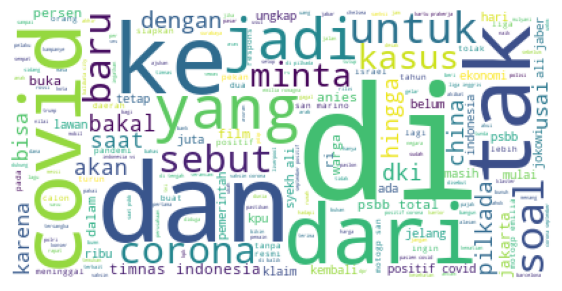

In [152]:
wordcloud = WordCloud(background_color = 'white').generate(big_title_string)
plt.figure(figsize=(7,7), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(wordcloud)
plt.axis('off')

In [162]:
bigger_string = ""
for i in df["content"]:
    bigger_string += i

In [163]:
pattern = '(S|s)senin|(s|S)elasa|(R|r)abu|(K|k)amis|(j|J)umat|(S|s)abtu|(m|M)inggu|(A|a)had \(\d{1,2}\/\d{1,2}\)'
len(re.findall(pattern, bigger_string))

4010

In [165]:
pattern2 = 'Jalan [A-Z][a-z]{1,50} {0,1}[A-Z]{0,50}[a-z]{0,12}'
len(re.findall(pattern2, bigger_string))

134

In [169]:
regex = re.compile(r'Jalan [A-Z][a-z]{1,50} {0,1}[A-Z]{0,50}[a-z]{0,12}') 
hasil = regex.search(bigger_string)
string = ""
for i in hasil.groups():
    string += str(i)

In [171]:
text_file = open("Korpus_Jalan.txt", "w")
n = text_file.write(string)
text_file.close()